In [1]:
# imports
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt #Data Visualization 

In [2]:
df = pd.read_csv('iris.csv')
print('Dataset has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))
df.head()

Dataset has 150 rows and 6 columns


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.drop(columns=['Id','Species'],inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
from sklearn.preprocessing import StandardScaler
standardscaler= StandardScaler()
X = standardscaler.fit_transform(df)

In [5]:
# kmeans clustering algorithm
from sklearn.cluster import KMeans

In [6]:
# finding wcss for each value of k in range 1 to 10
error = []
range_max = 10
for i in range(1,range_max):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    error.append(kmeans.inertia_)

Text(0.5, 1.0, 'The elbow method')

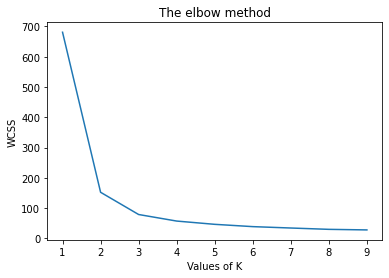

In [7]:
# visualizing the wcss found for each value of k
plt.plot([i for i in range(1,range_max)],error)
plt.xlabel('Values of K')
plt.ylabel('WCSS')
plt.title('The elbow method')

In [8]:
# finding optimal k value by the elbow method
optimal_k = 3
max_iter = 500
kmeans = KMeans(n_clusters=optimal_k, max_iter=max_iter)
y_kmeans = kmeans.fit_predict(df)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [9]:
d1 = df.values

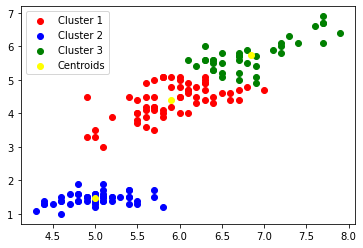

In [10]:
# plotting kmeans clusters with their centroids
plt.scatter(d1[y_kmeans == 0, 0], d1[y_kmeans == 0, 2], c = 'red', label = 'Cluster 1')
plt.scatter(d1[y_kmeans == 1, 0], d1[y_kmeans == 1, 2], c = 'blue', label = 'Cluster 2')
plt.scatter(d1[y_kmeans == 2, 0], d1[y_kmeans == 2, 2], c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

In [11]:
# hierarchial clustering using scipy
from scipy.cluster.hierarchy import dendrogram, linkage

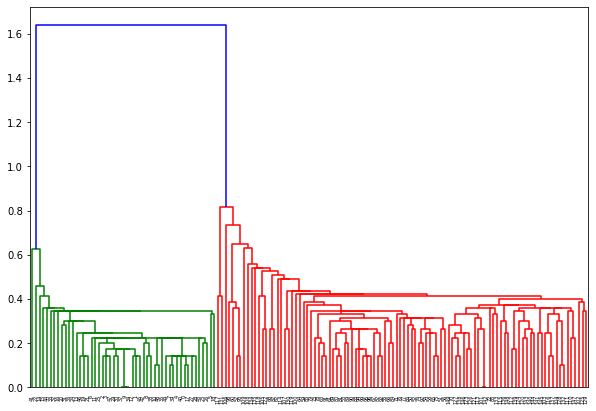

In [12]:
# single linkage
linked = linkage(df, 'single')

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

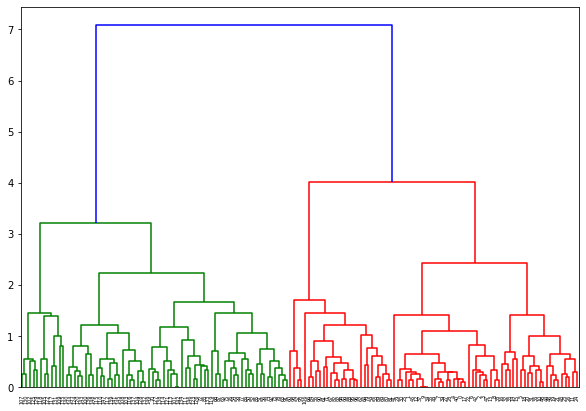

In [13]:
# complete linkage
linked = linkage(df, 'complete')

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

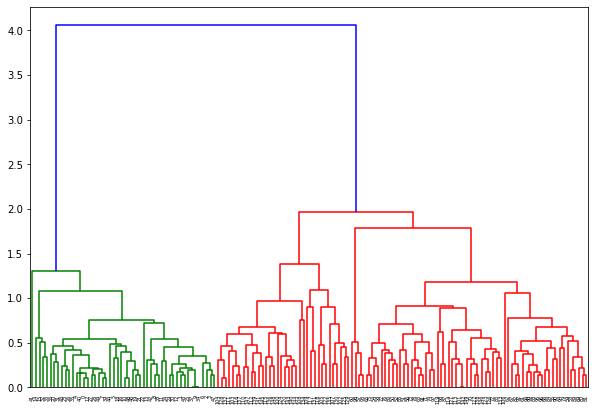

In [14]:
# average linkage
linked = linkage(df, 'average')

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [18]:
from sklearn.cluster import AgglomerativeClustering


In [19]:
cluster_ward = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster_ward.fit_predict(df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

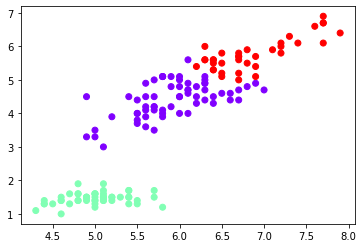

In [20]:
plt.scatter(df.iloc[:,0],df.iloc[:,2], c=cluster_ward.labels_, cmap='rainbow')

In [21]:
cluster_single = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
cluster_single.fit_predict(df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

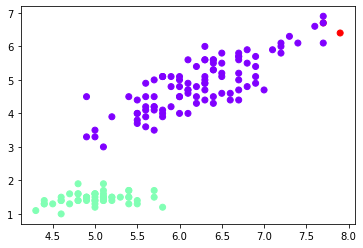

In [22]:
plt.scatter(df.iloc[:,0],df.iloc[:,2], c=cluster_single.labels_, cmap='rainbow')

In [23]:
cluster_average = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
cluster_average.fit_predict(df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

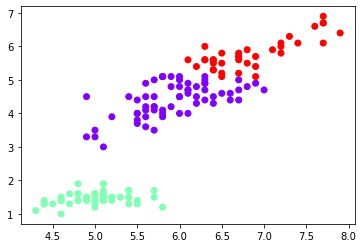

In [24]:
plt.scatter(df.iloc[:,0],df.iloc[:,2], c=cluster_average.labels_, cmap='rainbow')

In [25]:
cluster_complete = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
cluster_complete.fit_predict(df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

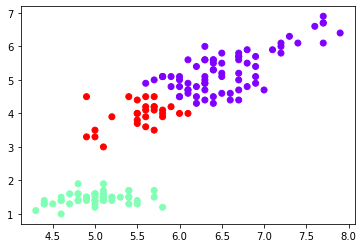

In [150]:
plt.scatter(df.iloc[:,0],df.iloc[:,2], c=cluster_complete.labels_, cmap='rainbow')